<a href="https://colab.research.google.com/github/oprostep/2023-fall_LP/blob/main/231203_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd /content/drive/MyDrive/archive

/content/drive/MyDrive/archive


Text(0.5, 1.0, 'James_Jones_0001')

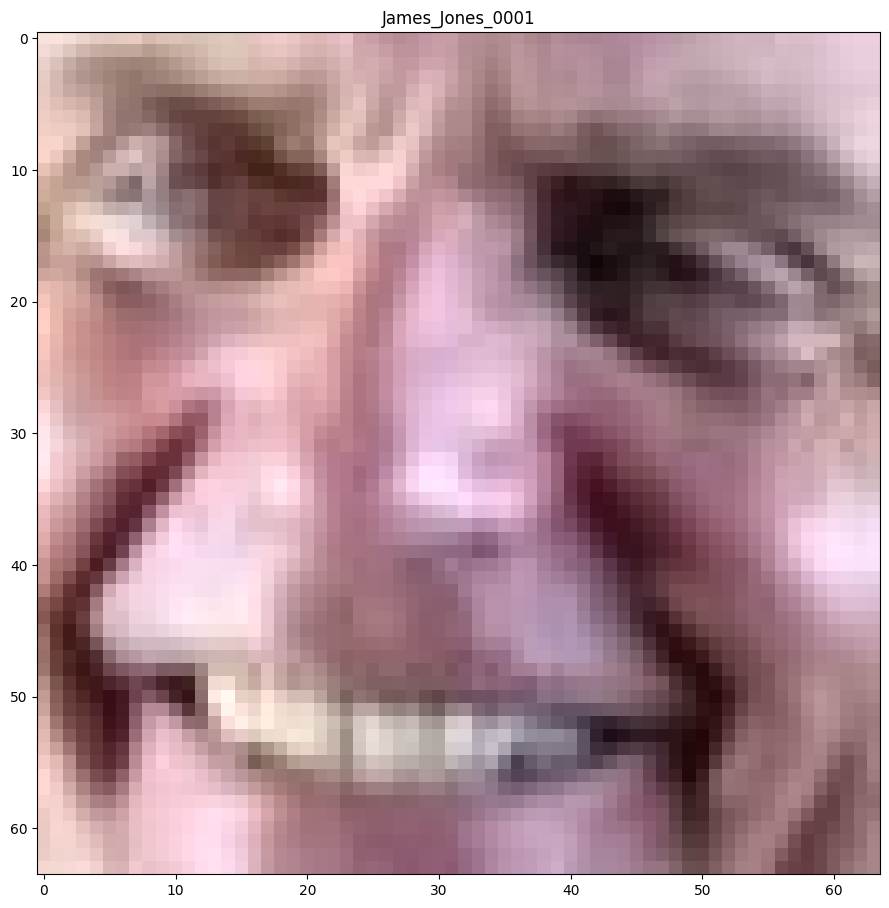

In [3]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('train/smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('James_Jones_0001')
#ax.axis('off');

In [4]:
image_sample.shape

(64, 64, 3)

In [5]:
cd /

/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras import callbacks
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )

train = train_gen.flow_from_directory(directory='/content/drive/MyDrive/archive/train',
                                              target_size=(64, 64),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=20,
                                              shuffle=True)


valid_gen = ImageDataGenerator(
        rescale=1./255
    )


test = valid_gen.flow_from_directory(directory='/content/drive/MyDrive/archive/test',
                                              target_size=(64, 64),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=3,
                                              shuffle=True)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

model.fit(train,validation_data=test,epochs=50,callbacks=callback_list)

Found 1203 images belonging to 2 classes.
Found 12030 images belonging to 1 classes.
Epoch 1/50
61/61 [==============================] - 1651s 27s/step - loss: 0.7247 - accuracy: 0.5303 - val_loss: 0.6893 - val_accuracy: 0.1637 - lr: 0.0010
Epoch 2/50
61/61 [==============================] - 31s 508ms/step - loss: 0.6938 - accuracy: 0.5187 - val_loss: 0.7088 - val_accuracy: 0.2761 - lr: 0.0010
Epoch 3/50
61/61 [==============================] - 31s 511ms/step - loss: 0.6890 - accuracy: 0.5644 - val_loss: 0.7261 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 4/50
61/61 [==============================] - 30s 500ms/step - loss: 0.6817 - accuracy: 0.5677 - val_loss: 0.6639 - val_accuracy: 0.8538 - lr: 0.0010
Epoch 5/50
61/61 [==============================] - 30s 498ms/step - loss: 0.6374 - accuracy: 0.6525 - val_loss: 0.7751 - val_accuracy: 0.2321 - lr: 0.0010
Epoch 6/50
61/61 [==============================] - 46s 757ms/step - loss: 0.6047 - accuracy: 0.6908 - val_loss: 0.8039 - val_accuracy: